In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Opinions_All_Cleaned.csv") 
df.head()

,Age,Occupation,Annual Income,Covered with Policy?,Type of Policy covered,Policy bought by whom,Interest in buying another policy,Reason for being interested in buying another policy,Criteria looked out for buying insurance,Reason for being uninterested in buying another policy,...,motor/vehicle_TPP,health_TPP,savings_TPP,travel_TPP,investment_TPP,nil_TPP,not sure_TPP,accident_TPP,critical illness_TPP,personal accident_TPP
0,22 to 36 years old,student,"$25,000 and below",yes,life insurance,parents,yes,for future precautions,affordability;coverage;clarity of policy,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,22 to 36 years old,student,no income,yes,not sure,parents,no,NaN,NaN,lack of information;family member(s) have alre...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,21 years old and under,student,no income,yes,life insurance,parents,no,NaN,NaN,lack of information;family member(s) have alre...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,22 to 36 years old,student,no income,yes,not sure,parents,yes,for investment purposes;for future precautions,affordability;coverage;multi policy discounts;...,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,21 years old and under,student,no income,yes,life insurance;motor/vehicle insurance;health ...,parents,no,NaN,NaN,family member(s) have already bought it for you,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Separate df into people who are interested/not interested in buying an insurance

In [4]:
df_interested = df[df['Interest in buying another policy'] == "yes"]
df_interested = df_interested.drop('Reason for being uninterested in buying another policy',1)
df_interested = df_interested.drop('Interest in buying another policy',1)
df_interested.head()

,Age,Occupation,Annual Income,Covered with Policy?,Type of Policy covered,Policy bought by whom,Reason for being interested in buying another policy,Criteria looked out for buying insurance,Areas of coverage,Situation in which insurance will help you,...,motor/vehicle_TPP,health_TPP,savings_TPP,travel_TPP,investment_TPP,nil_TPP,not sure_TPP,accident_TPP,critical illness_TPP,personal accident_TPP
0,22 to 36 years old,student,"$25,000 and below",yes,life insurance,parents,for future precautions,affordability;coverage;clarity of policy,pandemic,pandemic,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,22 to 36 years old,student,no income,yes,not sure,parents,for investment purposes;for future precautions,affordability;coverage;multi policy discounts;...,sickness;death;accident;fraud;housing/property,pandemic,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,22 to 36 years old,student,"$25,000 and below",yes,life insurance;health insurance;travel insuran...,parents,for investment purposes;for future precautions,affordability;coverage;convenience (eg. easy t...,sickness;accident;travel;pandemic;disability;h...,hospitalisation,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11,22 to 36 years old,student,"$25,000 and below",no,nil,nil,for investment purposes;for future precautions,"coverage;convenience (eg. easy to buy, easy to...",sickness;death;accident;travel;pandemic;fraud;...,hospitalisation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,21 years old and under,NaN,"$25,000 and below",no,nil,nil,for investment purposes;for future precautions,affordability;coverage;customer service;multi ...,sickness;death;accident;travel;pandemic;fraud;...,when paying for medical bills,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
df_uninterested = df[df['Interest in buying another policy'] == 'no']
df_uninterested = df_uninterested.drop('Reason for being interested in buying another policy',1)
df_uninterested = df_uninterested.drop('Criteria looked out for buying insurance',1)
df_uninterested = df_uninterested.drop('Interest in buying another policy',1)

df_uninterested.head()

,Age,Occupation,Annual Income,Covered with Policy?,Type of Policy covered,Policy bought by whom,Reason for being uninterested in buying another policy,Areas of coverage,Situation in which insurance will help you,Heard of Prudential?,...,motor/vehicle_TPP,health_TPP,savings_TPP,travel_TPP,investment_TPP,nil_TPP,not sure_TPP,accident_TPP,critical illness_TPP,personal accident_TPP
1,22 to 36 years old,student,no income,yes,not sure,parents,lack of information;family member(s) have alre...,sickness;pandemic;fraud,train breakdown then i need to take other mode...,yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,21 years old and under,student,no income,yes,life insurance,parents,lack of information;family member(s) have alre...,travel,NaN,yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,21 years old and under,student,no income,yes,life insurance;motor/vehicle insurance;health ...,parents,family member(s) have already bought it for you,sickness;death;accident;travel;pandemic;fraud;...,NaN,yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,22 to 36 years old,cleaner,"$25,000 and below",no,nil,nil,ficial difficulties,sickness;death,medical bills,yes,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,22 to 36 years old,student,no income,yes,life insurance;health insurance,"parents;they purchase first, then i will pay w...",lack of information;unnecessary;family member(...,travel;disability,none do far,yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Create new DF for clustering

In [6]:
df_interested_clustering = df_interested.iloc[:,:9]
df_interested_clustering.head()

,Age,Occupation,Annual Income,Covered with Policy?,Type of Policy covered,Policy bought by whom,Reason for being interested in buying another policy,Criteria looked out for buying insurance,Areas of coverage
0,22 to 36 years old,student,"$25,000 and below",yes,life insurance,parents,for future precautions,affordability;coverage;clarity of policy,pandemic
3,22 to 36 years old,student,no income,yes,not sure,parents,for investment purposes;for future precautions,affordability;coverage;multi policy discounts;...,sickness;death;accident;fraud;housing/property
5,22 to 36 years old,student,"$25,000 and below",yes,life insurance;health insurance;travel insuran...,parents,for investment purposes;for future precautions,affordability;coverage;convenience (eg. easy t...,sickness;accident;travel;pandemic;disability;h...
11,22 to 36 years old,student,"$25,000 and below",no,nil,nil,for investment purposes;for future precautions,"coverage;convenience (eg. easy to buy, easy to...",sickness;death;accident;travel;pandemic;fraud;...
15,21 years old and under,NaN,"$25,000 and below",no,nil,nil,for investment purposes;for future precautions,affordability;coverage;customer service;multi ...,sickness;death;accident;travel;pandemic;fraud;...


In [7]:
df_uninterested_clustering = df_uninterested.iloc[:,:8]
df_uninterested_clustering

,Age,Occupation,Annual Income,Covered with Policy?,Type of Policy covered,Policy bought by whom,Reason for being uninterested in buying another policy,Areas of coverage
1,22 to 36 years old,student,no income,yes,not sure,parents,lack of information;family member(s) have alre...,sickness;pandemic;fraud
2,21 years old and under,student,no income,yes,life insurance,parents,lack of information;family member(s) have alre...,travel
4,21 years old and under,student,no income,yes,life insurance;motor/vehicle insurance;health ...,parents,family member(s) have already bought it for you,sickness;death;accident;travel;pandemic;fraud;...
6,22 to 36 years old,cleaner,"$25,000 and below",no,nil,nil,ficial difficulties,sickness;death
7,22 to 36 years old,student,no income,yes,life insurance;health insurance,"parents;they purchase first, then i will pay w...",lack of information;unnecessary;family member(...,travel;disability
8,21 years old and under,student,no income,yes,life insurance,parents,ficial difficulties;unnecessary,theres this insurance that grows money for ur ...
9,22 to 36 years old,undergraduate,"$25,000 and below",yes,life insurance;health insurance;investment ins...,myself;parents,ficial difficulties;family member(s) have alre...,sickness;death;accident;pandemic;disability
10,22 to 36 years old,student,"above $200,000",yes,motor/vehicle insurance,nil,too mainstream,i said no though
12,22 to 36 years old,student,no income,yes,life insurance;health insurance;travel insuran...,parents,unnecessary,sickness;accident
13,22 to 36 years old,NaN,no income,yes,life insurance;health insurance,parents,ficial difficulties;lack of information;family...,sickness;death;accident;travel;pandemic;fraud;...


## Encoding

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()

final_interested ={}
for col in df_interested_clustering.columns:
    df_interested_clustering[col] = le.fit_transform(df_interested_clustering[col].values.astype(str))
    final_interested[col]= dict(zip(le.transform(le.classes_),le.classes_))
    
final_uninterested ={}
for col in df_uninterested_clustering.columns:
    df_uninterested_clustering[col] = le.fit_transform(df_uninterested_clustering[col].values.astype(str))
    final_uninterested[col]= dict(zip(le.transform(le.classes_),le.classes_))

In [9]:
df_interested_clustering.head()

,Age,Occupation,Annual Income,Covered with Policy?,Type of Policy covered,Policy bought by whom,Reason for being interested in buying another policy,Criteria looked out for buying insurance,Areas of coverage
0,1,7,0,1,5,3,0,3,13
3,1,7,3,1,19,3,2,12,29
5,1,7,0,1,11,3,2,5,23
11,1,7,0,0,18,2,2,16,39
15,0,4,0,0,18,2,2,9,39


In [10]:
df_uninterested_clustering.head()

,Age,Occupation,Annual Income,Covered with Policy?,Type of Policy covered,Policy bought by whom,Reason for being uninterested in buying another policy,Areas of coverage
1,1,15,4,1,23,4,16,59
2,0,15,4,1,6,4,16,64
4,0,15,4,1,15,4,1,53
6,1,4,0,0,22,3,5,43
7,1,15,4,1,7,5,18,65


## Clustering

In [11]:
from sklearn.cluster import KMeans

features_interested = df_interested_clustering[df_interested_clustering.columns]
features_uninterested = df_uninterested_clustering[df_uninterested_clustering.columns]

## Interested Cluster

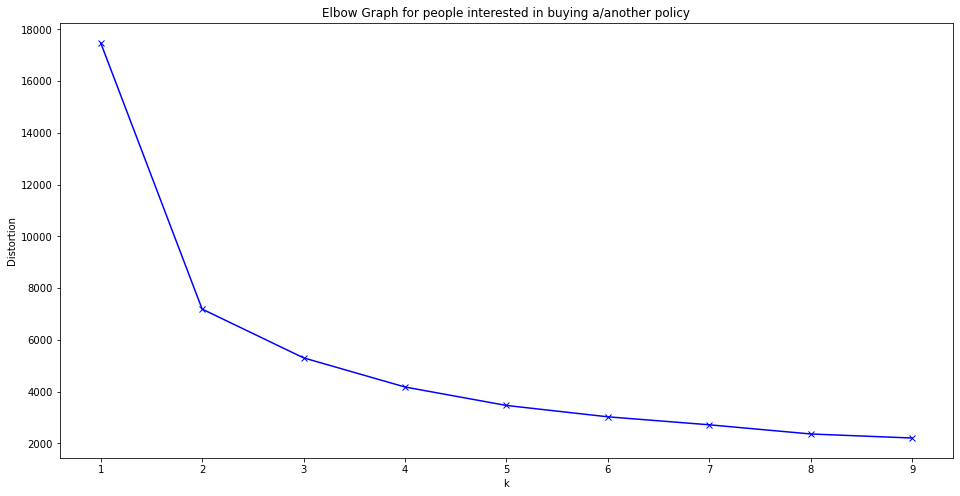

In [12]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features_interested)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Graph for people interested in buying a/another policy')
plt.show()

Elbow point is 3

In [13]:
kmeanModel_interested = KMeans(n_clusters=3, random_state=420) #change n_clusters accordingly to elbow point
kmeanModel_interested.fit(features_interested)

#store cluster label in new column
df_interested_clustering['cluster'] = kmeanModel_interested.labels_ +1

In [14]:
#see how many customers are in each cluster (interested)
df_interested_clustering['cluster'].value_counts(sort = False)

1    25
2    26
3    18
Name: cluster, dtype: int64

In [15]:
#calculating z score
#cluster mean
clus_mean_interested = df_interested_clustering.groupby(['cluster'])['Age','Occupation','Annual Income','Covered with Policy?','Type of Policy covered','Policy bought by whom','Reason for being interested in buying another policy','Criteria looked out for buying insurance','Areas of coverage'].mean()

#population mean
pop_means_interested = pd.Series(df_interested_clustering[['Age','Occupation','Annual Income','Covered with Policy?','Type of Policy covered','Policy bought by whom','Reason for being interested in buying another policy','Criteria looked out for buying insurance','Areas of coverage']].mean())

#Calculating population std deviation
pop_std_interested = pd.Series(df_interested_clustering[['Age','Occupation','Annual Income','Covered with Policy?','Type of Policy covered','Policy bought by whom','Reason for being interested in buying another policy','Criteria looked out for buying insurance','Areas of coverage']].std())

clus_mean_interested.T.info() #transpose is .T

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Age to Areas of coverage
Data columns (total 3 columns):
1    9 non-null float64
2    9 non-null float64
3    9 non-null float64
dtypes: float64(3)
memory usage: 288.0+ bytes


In [16]:
#Saving a copy of the transposed DF
clus_mean_interested_t = clus_mean_interested.T

clus_mean_interested_t.columns = ['Cluster1','Cluster2','Cluster3'] 

clus_mean_interested_t

,Cluster1,Cluster2,Cluster3
Age,0.80,0.615385,0.833333
Occupation,6.48,6.769231,6.055556
Annual Income,1.84,1.846154,1.944444
Covered with Policy?,0.68,1.000000,1.000000
Type of Policy covered,16.32,5.730769,3.111111
Policy bought by whom,2.08,2.384615,2.111111
Reason for being interested in buying another policy,1.16,0.884615,0.944444
Criteria looked out for buying insurance,8.48,7.653846,6.166667
Areas of coverage,34.16,11.076923,37.611111


In [17]:
#join works easily when joining on index
temp1_interested = clus_mean_interested_t.join(pd.DataFrame(pop_means_interested))
temp1_interested.columns = ['Cluster1','Cluster2','Cluster3','pop_mean'] 

temp2_interested = temp1_interested.join(pd.DataFrame(pop_std_interested))
temp2_interested.columns = ['Cluster1','Cluster2','Cluster3','pop_mean','pop_std']  

temp2_interested

,Cluster1,Cluster2,Cluster3,pop_mean,pop_std
Age,0.80,0.615385,0.833333,0.739130,0.442326
Occupation,6.48,6.769231,6.055556,6.478261,1.481342
Annual Income,1.84,1.846154,1.944444,1.869565,1.413309
Covered with Policy?,0.68,1.000000,1.000000,0.884058,0.322501
Type of Policy covered,16.32,5.730769,3.111111,8.884058,6.846073
Policy bought by whom,2.08,2.384615,2.111111,2.202899,1.207571
Reason for being interested in buying another policy,1.16,0.884615,0.944444,1.000000,1.014599
Criteria looked out for buying insurance,8.48,7.653846,6.166667,7.565217,4.424126
Areas of coverage,34.16,11.076923,37.611111,26.362319,13.554868


In [18]:
z_score_interested = pd.DataFrame(np.random.randn(9, 3))
z_score_interested.columns = ['Cluster1','Cluster2','Cluster3'] 
z_score_interested.index = ['Age','Occupation','Annual Income','Covered with Policy?','Type of Policy covered','Policy bought by whom','Reason for being interested in buying another policy','Criteria looked out for buying insurance','Areas of coverage']

#applying formula for z_score for profiling 
v = 0
for v in range(9):
    clus = 0
    for clus in range(3):
        z_score_interested.iloc[v,clus] = (temp2_interested.iloc[v,clus] - temp2_interested.iloc[v,3])/ (temp2_interested.iloc[v,4])
        clus = clus + 1 
    v = v + 1 
    
z_score_interested.round(2)

,Cluster1,Cluster2,Cluster3
Age,0.14,-0.28,0.21
Occupation,0.00,0.20,-0.29
Annual Income,-0.02,-0.02,0.05
Covered with Policy?,-0.63,0.36,0.36
Type of Policy covered,1.09,-0.46,-0.84
Policy bought by whom,-0.10,0.15,-0.08
Reason for being interested in buying another policy,0.16,-0.11,-0.05
Criteria looked out for buying insurance,0.21,0.02,-0.32
Areas of coverage,0.58,-1.13,0.83


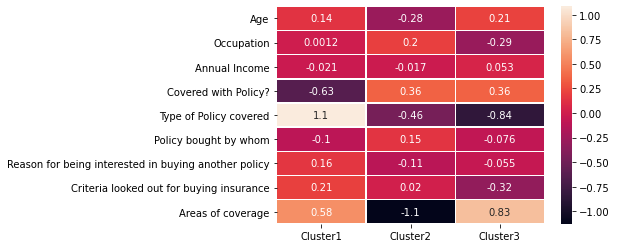

In [19]:
ax = sns.heatmap(z_score_interested,linewidths=.5,annot=True)

In [20]:
pd.set_option('display.max_colwidth', 0)
z_score_interested = abs(z_score_interested)
print("For people Uninterested in buying policies: \n Highly ranked variable(s): \n")
high_var = z_score_interested.idxmax().to_frame()
display(high_var)

For people Uninterested in buying policies: 
 Highly ranked variable(s): 



,0
Cluster1,Type of Policy covered
Cluster2,Areas of coverage
Cluster3,Type of Policy covered


## Not Interested Cluster

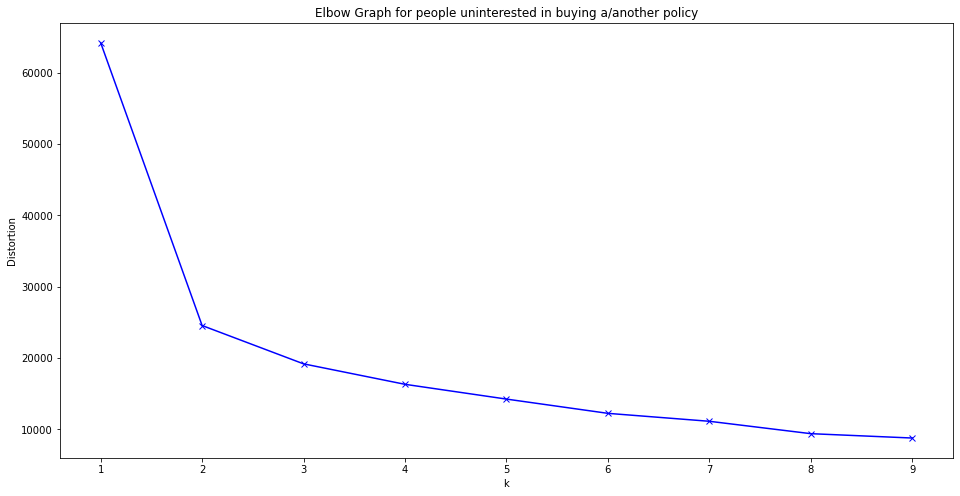

In [21]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features_uninterested)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Graph for people uninterested in buying a/another policy')
plt.show()

Elbow point is 3

In [22]:
kmeanModel_uninterested = KMeans(n_clusters=3, random_state=420) #change n_clusters accordingly to elbow point
kmeanModel_uninterested.fit(features_uninterested)

#store cluster label in new column
df_uninterested_clustering['cluster'] = kmeanModel_uninterested.labels_+1

In [23]:
#see how many customers are in each cluster (uninterested)
df_uninterested_clustering['cluster'].value_counts(sort = False)

1    30
2    47
3    33
Name: cluster, dtype: int64

In [24]:
#calculating z score
#cluster mean
clus_mean_uninterested = df_uninterested_clustering.groupby(['cluster'])['Age','Occupation','Annual Income','Covered with Policy?','Type of Policy covered','Policy bought by whom','Reason for being uninterested in buying another policy','Areas of coverage'].mean()
#population mean
pop_means_uninterested = pd.Series(df_uninterested_clustering[['Age','Occupation','Annual Income','Covered with Policy?','Type of Policy covered','Policy bought by whom','Reason for being uninterested in buying another policy','Areas of coverage']].mean())
#Calculating population std deviation
pop_std_uninterested = pd.Series(df_uninterested_clustering[['Age','Occupation','Annual Income','Covered with Policy?','Type of Policy covered','Policy bought by whom','Reason for being uninterested in buying another policy','Areas of coverage']].std())
clus_mean_uninterested.T.info() #transpose is .T

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Age to Areas of coverage
Data columns (total 3 columns):
1    8 non-null float64
2    8 non-null float64
3    8 non-null float64
dtypes: float64(3)
memory usage: 256.0+ bytes


In [25]:
#Saving a copy of the transposed DF
clus_mean_uninterested_t = clus_mean_uninterested.T
clus_mean_uninterested_t.columns = ['Cluster1','Cluster2','Cluster3'] 
clus_mean_uninterested_t


,Cluster1,Cluster2,Cluster3
Age,0.666667,0.787234,0.757576
Occupation,13.966667,13.255319,12.939394
Annual Income,3.066667,2.872340,3.363636
Covered with Policy?,0.766667,0.765957,0.939394
Type of Policy covered,14.066667,12.063830,8.242424
Policy bought by whom,3.133333,3.063830,3.242424
Reason for being uninterested in buying another policy,5.900000,11.106383,14.696970
Areas of coverage,42.233333,14.638298,60.969697


In [26]:
#join works easily when joining on index
temp1_uninterested = clus_mean_uninterested_t.join(pd.DataFrame(pop_means_uninterested))
temp1_uninterested.columns = ['Cluster1','Cluster2','Cluster3','pop_mean'] 

temp2_uninterested = temp1_uninterested.join(pd.DataFrame(pop_std_uninterested))
temp2_uninterested.columns = ['Cluster1','Cluster2','Cluster3','pop_mean','pop_std']  
temp2_uninterested

,Cluster1,Cluster2,Cluster3,pop_mean,pop_std
Age,0.666667,0.787234,0.757576,0.745455,0.437599
Occupation,13.966667,13.255319,12.939394,13.354545,3.779681
Annual Income,3.066667,2.872340,3.363636,3.072727,1.572173
Covered with Policy?,0.766667,0.765957,0.939394,0.818182,0.387460
Type of Policy covered,14.066667,12.063830,8.242424,11.463636,7.826885
Policy bought by whom,3.133333,3.063830,3.242424,3.136364,1.480623
Reason for being uninterested in buying another policy,5.900000,11.106383,14.696970,10.763636,7.466042
Areas of coverage,42.233333,14.638298,60.969697,36.063636,21.272059


In [27]:
z_score_uninterested = pd.DataFrame(np.random.randn(8, 3))
z_score_uninterested.columns = ['Cluster1','Cluster2','Cluster3'] 
z_score_uninterested.index = ['Age','Occupation','Annual Income','Covered with Policy?','Type of Policy covered','Policy bought by whom','Reason for being uninterested in buying another policy','Areas of coverage']

#applying formula for z_score for profiling 
v = 0
for v in range(8):
    clus = 0
    for clus in range(3):
        z_score_uninterested.iloc[v,clus] = (temp2_uninterested.iloc[v,clus] - temp2_uninterested.iloc[v,3])/ (temp2_uninterested.iloc[v,4])
        clus = clus + 1 
    v = v + 1 
z_score_uninterested.round(2)


,Cluster1,Cluster2,Cluster3
Age,-0.18,0.10,0.03
Occupation,0.16,-0.03,-0.11
Annual Income,-0.00,-0.13,0.19
Covered with Policy?,-0.13,-0.13,0.31
Type of Policy covered,0.33,0.08,-0.41
Policy bought by whom,-0.00,-0.05,0.07
Reason for being uninterested in buying another policy,-0.65,0.05,0.53
Areas of coverage,0.29,-1.01,1.17


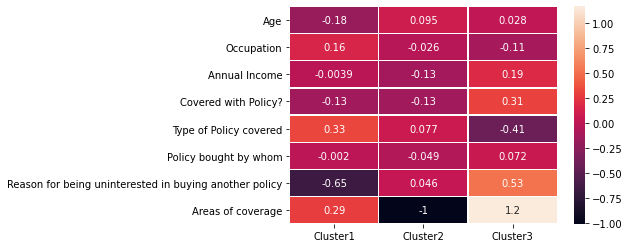

In [28]:
ax = sns.heatmap(z_score_uninterested,annot=True,linewidths=.5)

In [29]:
pd.set_option('display.max_colwidth', 0)
z_score_uninterested = abs(z_score_uninterested)
print("For people Uninterested in buying policies: \n Highly ranked variable(s): \n")
high_var = z_score_uninterested.idxmax().to_frame()
display(high_var)

For people Uninterested in buying policies: 
 Highly ranked variable(s): 



,0
Cluster1,Reason for being uninterested in buying another policy
Cluster2,Areas of coverage
Cluster3,Areas of coverage


### Convert Back Encoding

In [30]:
#revert back the category names

for col in df_interested_clustering.columns[:-1]:
    
    df_interested_clustering[col]=df_interested_clustering[col].apply(lambda x: final_interested[col][x])
    
for col in df_uninterested_clustering.columns[:-1]:

    df_uninterested_clustering[col]=df_uninterested_clustering[col].apply(lambda x: final_uninterested[col][x])

### Interested Cluster
#### Interested - Type of policy covered

In [31]:
#for interested cluster
a=df_interested_clustering
a['Type of Policy covered'] = df_interested_clustering['Type of Policy covered'].apply(lambda x: x.split(";"))
a=df_interested_clustering.explode("Type of Policy covered")
a.groupby(["cluster","Type of Policy covered"])['Type of Policy covered'].count()

cluster  Type of Policy covered 
1        health insurance           8 
         investment insurance       1 
         life insurance             10
         motor/vehicle insurance    7 
         nil                        8 
         not sure                   7 
         savings insurance          5 
         travel insurance           4 
2        health insurance           17
         investment insurance       3 
         life insurance             17
         not sure                   2 
         savings insurance          4 
         travel insurance           4 
3        health insurance           17
         life insurance             8 
         not sure                   2 
         savings insurance          2 
         travel insurance           1 
Name: Type of Policy covered, dtype: int64

Cluster 1 is Life insurance. 
Cluster 2 is Health and Life insurance.
Cluster 3 is Health insurance.

#### Interested - Areas of coverage 

In [32]:
#for interested cluster
a= df_interested_clustering
a['Areas of coverage'] = df_interested_clustering['Areas of coverage'].apply(lambda x: x.split(";"))
a=a.explode("Areas of coverage")

a.groupby(["cluster","Areas of coverage"])['Areas of coverage'].count()

cluster  Areas of coverage                                
1        accident                                             24
         death                                                23
         disability                                           15
         divorce                                              1 
         fraud                                                15
         housing/property                                     21
         pandemic                                             14
         sickness                                             25
         travel                                               18
2        accident                                             9 
         death                                                5 
         disability                                           7 
         fraud                                                10
         housing/property                                     6 
         investments, everyday 

Cluster 1 is Sickness. Cluster 2 is Pandemic. Cluster 3 is Sickness

#### Interested - Policy bought by whom

In [33]:
#for interested cluster
a= df_interested_clustering
#a['Policy bought by whom'] = df_interested_clustering['Policy bought by whom'].apply(lambda x: x.split(";"))
a=a.explode("Policy bought by whom")
a.groupby(["cluster","Policy bought by whom"])['Policy bought by whom'].count()

cluster  Policy bought by whom                          
1        myself                                             1 
         myself;parents                                     6 
         nil                                                8 
         parents                                            10
2        myself                                             4 
         myself;parents                                     3 
         parents                                            18
         school                                             1 
3        myself                                             5 
         myself;parents                                     1 
         parents                                            11
         parents;government: dependent protection scheme    1 
Name: Policy bought by whom, dtype: int64

Across all clusters, policies are mostly bought by parents

#### Interested - Reason for being interested in buying another policy

In [34]:
b= df_interested_clustering
b['Reason for being interested in buying another policy'] = df_interested_clustering['Reason for being interested in buying another policy'].apply(lambda x: x.split(";"))
b=b.explode("Reason for being interested in buying another policy")
b.groupby(["cluster","Reason for being interested in buying another policy"])['Reason for being interested in buying another policy'].count()

cluster  Reason for being interested in buying another policy
1        for future precautions                                  25
         for investment purposes                                 14
         peer/family pressure                                    1 
2        for future precautions                                  18
         for investment purposes                                 13
         peer/family pressure                                    1 
3        for future precautions                                  15
         for investment purposes                                 10
Name: Reason for being interested in buying another policy, dtype: int64

Across all clsuters, the reason for being interested in buying another policy is for future precautions

#### Interested -  Occupation

In [35]:
df_interested_clustering.groupby(['cluster','Occupation'])['Occupation'].count()

cluster  Occupation       
1        cleaner              1 
         nan                  2 
         salesperson          1 
         student              21
2        ficial consultant    1 
         nan                  1 
         student              23
         technical officer    1 
3        ascd                 1 
         developer            1 
         nan                  1 
         nsf                  1 
         student              14
Name: Occupation, dtype: int64

Across all clusters, respondents are mostly students

#### Interested - Criteria looked out for buying insurance

In [36]:
#for interested cluster
a= df_interested_clustering
a['Criteria looked out for buying insurance'] = df_interested_clustering['Criteria looked out for buying insurance'].apply(lambda x: x.split(";"))
a=a.explode("Criteria looked out for buying insurance")

a.groupby(["cluster","Criteria looked out for buying insurance"])['Criteria looked out for buying insurance'].count()

cluster  Criteria looked out for buying insurance    
1        affordability                                   22
         clarity of policy                               21
         convenience (eg. easy to buy, easy to claim)    19
         coverage                                        25
         customer service                                12
         multi policy discounts                          9 
2        affordability                                   22
         clarity of policy                               21
         convenience (eg. easy to buy, easy to claim)    21
         coverage                                        23
         customer service                                10
         multi policy discounts                          6 
3        affordability                                   17
         clarity of policy                               15
         company, payout & how does it work.             1 
         convenience (eg. easy to buy, easy to

Cluster 1 and 2 is Coverage. Cluster 3 is Affordability.

#### Interested - Annual Income

In [37]:
df_interested_clustering.groupby(['cluster','Annual Income'])['Annual Income'].count()

cluster  Annual Income      
1        $25,000 and below      9 
         $25,001 to $50,000     1 
         no income              15
2        $25,000 and below      9 
         $25,001 to $50,000     1 
         $50,001 to $100,000    1 
         no income              15
3        $25,000 and below      5 
         $25,001 to $50,000     2 
         no income              11
Name: Annual Income, dtype: int64

Across all clusters, majority of respondents have no income since they are students

### Uninterested Cluster

#### Uninterested - Type of policy covered

In [38]:
#for uninterested cluster
b= df_uninterested_clustering
b['Type of Policy covered'] = df_uninterested_clustering['Type of Policy covered'].apply(lambda x: x.split(";"))
b=b.explode("Type of Policy covered")
b.groupby(["cluster","Type of Policy covered"])['Type of Policy covered'].count()

cluster  Type of Policy covered 
1        health insurance           12
         investment insurance       4 
         life insurance             16
         motor/vehicle insurance    2 
         nil                        6 
         not sure                   6 
         savings insurance          6 
         travel insurance           4 
2        health insurance           25
         investment insurance       2 
         life insurance             25
         motor/vehicle insurance    3 
         nil                        11
         not sure                   3 
         savings insurance          11
         travel insurance           6 
3        health insurance           21
         investment insurance       4 
         life insurance             22
         motor/vehicle insurance    2 
         nil                        2 
         not sure                   2 
         savings insurance          6 
         travel insurance           2 
Name: Type of Policy covered, d

Cluster 1 and 3 is Life. Cluster 2 is Health and Life. 

#### Uninterested - Area of coverage

In [39]:
b= df_uninterested_clustering
b['Areas of coverage'] = df_uninterested_clustering['Areas of coverage'].apply(lambda x: x.split(";"))
b=b.explode('Areas of coverage')
b.groupby(["cluster",'Areas of coverage'])['Areas of coverage'].count()

cluster  Areas of coverage                                                                 
1        accident                                                                              24
         crime, damaged products (laptops, gaming consoles etc)                                1 
         death                                                                                 15
         disability                                                                            15
         fraud                                                                                 12
         housing/property                                                                      19
         natural disaster like tsunamis                                                        1 
         pandemic                                                                              14
         sickness                                                                              26
         travel           

Cluster 1 is Sickness, Cluster 2 is Housing/property and Cluster 3 is Travel

#### Uninterested - Policy bought by whom

In [40]:
b= df_uninterested_clustering
b['Policy bought by whom'] = df_uninterested_clustering['Policy bought by whom'].apply(lambda x: x.split(";"))
b=b.explode("Policy bought by whom")
b.groupby(["cluster","Policy bought by whom"])['Policy bought by whom'].count()

cluster  Policy bought by whom                          
1        brother                                            1 
         myself                                             6 
         nil                                                7 
         parents                                            21
2        myself                                             10
         nil                                                12
         parents                                            26
         school                                             1 
         school. smu buys for everyone each year.           1 
3        myself                                             7 
         nil                                                2 
         parents                                            28
         they purchase first, then i will pay when i can    1 
Name: Policy bought by whom, dtype: int64

Across all clusters, policies are mostly bought by parents.

####  Uninterested - Reason for being uninterested in buying another policy

In [41]:
b= df_uninterested_clustering
b['Reason for being uninterested in buying another policy'] = df_uninterested_clustering['Reason for being uninterested in buying another policy'].apply(lambda x: x.split(";"))
b=b.explode("Reason for being uninterested in buying another policy")
b.groupby(["cluster","Reason for being uninterested in buying another policy"])['Reason for being uninterested in buying another policy'].count()

cluster  Reason for being uninterested in buying another policy                  
1        better roi myself                                                           1 
         covered enough already                                                      1 
         currently not looking to buy insurance. planning to in the future though    1 
         family member(s) have already bought it for you                             18
         ficial difficulties                                                         10
         lack of information                                                         7 
         mom is an insurance agent                                                   1 
         no idea how it works                                                        1 
         unnecessary                                                                 4 
2        family member(s) have already bought it for you                             24
         ficial difficulties          

Across all clusters, family member(s) have already bought it for respondents. Cluster 3 also felt that it was unnecesary.

#### Uninterested - Occupation

In [42]:
df_uninterested_clustering.groupby(['cluster','Occupation'])['Occupation'].count()

cluster  Occupation             
1        cleaner                    1 
         nan                        3 
         student                    25
         undergraduate              1 
2        accountant                 1 
         admin & logistics          1 
         admin executive            2 
         laboratory technologist    1 
         nan                        1 
         nsf                        1 
         preschool teacher          1 
         self employed              1 
         soldier                    1 
         student                    37
3        accountant                 1 
         actuary                    1 
         legal executive            1 
         manager                    1 
         nan                        2 
         pr                         1 
         real estate agent          1 
         student                    25
Name: Occupation, dtype: int64

Across all clusters, respondents are mostly students

#### Uninterested - Annual income

In [43]:
df_uninterested_clustering.groupby(['cluster','Annual Income'])['Annual Income'].count()

cluster  Annual Income      
1        $25,000 and below      7 
         no income              23
2        $25,000 and below      7 
         $25,001 to $50,000     8 
         above $200,000         1 
         no income              31
3        $25,000 and below      2 
         $25,001 to $50,000     3 
         $50,001 to $100,000    2 
         no income              26
Name: Annual Income, dtype: int64

Across all clusters, majority of respondents have no income since they are students